In [ ]:
### Yiğit Şevki KAPLAN
### 22243810049
### 22.10.2025

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
# libraries imported

In [ ]:
pstar = pd.read_csv('pulsar_stars.csv')

In [ ]:
pstar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


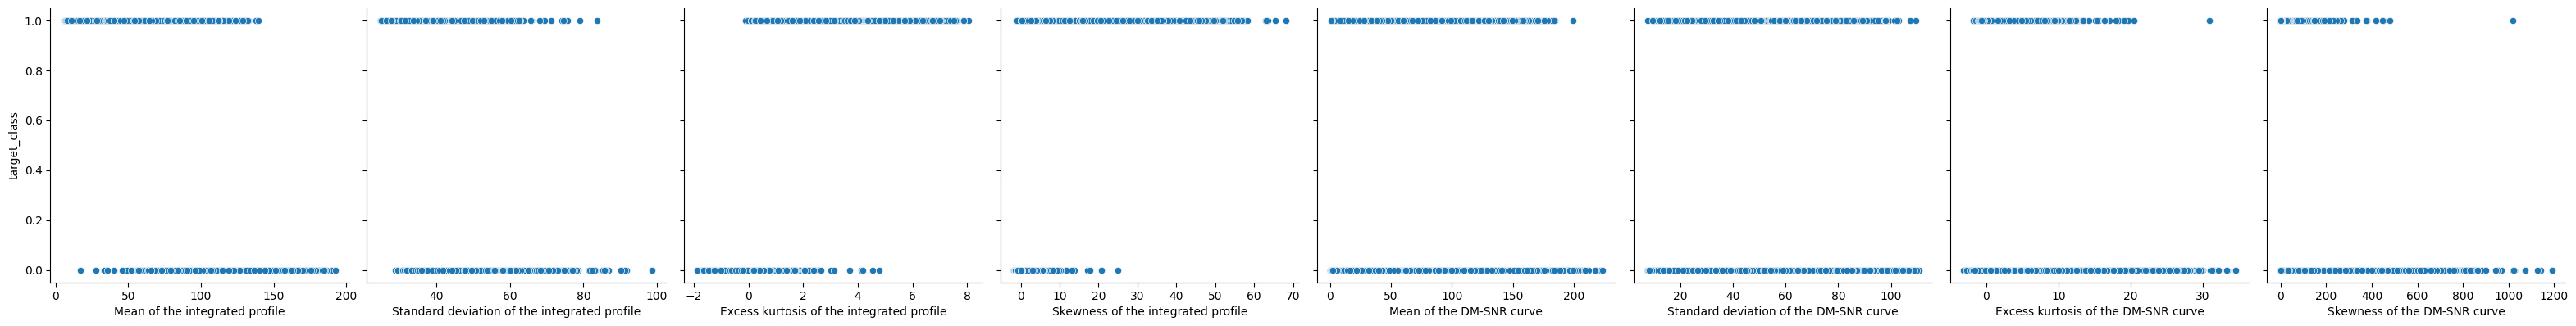

In [ ]:
sns.pairplot(pstar, x_vars= ['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve',  'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve'], y_vars = ['target_class'], size = 4)

In [ ]:
Y = pstar['target_class']
X = pstar.drop('target_class', axis=1)

In [ ]:
pstar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
# all varibles are float64 or int64, there is no strings to convert

In [ ]:
X.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state= 149)

In [ ]:
x_train_sm = sm.add_constant(x_train)

In [ ]:
logml_train = sm.Logit(y_train, x_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.074988
         Iterations 9


In [ ]:
print(logml_train.summary())

                           Logit Regression Results                           
Dep. Variable:           target_class   No. Observations:                14318
Model:                          Logit   Df Residuals:                    14309
Method:                           MLE   Df Model:                            8
Date:                Wed, 05 Nov 2025   Pseudo R-squ.:                  0.7566
Time:                        07:55:55   Log-Likelihood:                -1073.7
converged:                       True   LL-Null:                       -4410.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -8.3423      1.069     -7.806      0.000     -10.437      -6.248
Mean of the integrated profil

In [ ]:
print(np.exp(logml_train.params))

const                                             0.000238
Mean of the integrated profile                    1.027719
Standard deviation of the integrated profile      0.960392
Excess kurtosis of the integrated profile       574.442446
Skewness of the integrated profile                0.547488
Mean of the DM-SNR curve                          0.972084
Standard deviation of the DM-SNR curve            1.053206
Excess kurtosis of the DM-SNR curve               1.043386
Skewness of the DM-SNR curve                      0.995823
dtype: float64


In [ ]:
print(logml_train.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:           target_class
Method:                          dydx
At:                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Mean of the integrated profile                   0.0005      0.000      4.199      0.000       0.000       0.001
Standard deviation of the integrated profile    -0.0007      0.000     -3.499      0.000      -0.001      -0.000
Excess kurtosis of the integrated profile        0.1126      0.006     17.879      0.000       0.100       0.125
Skewness of the integrated profile              -0.0107      0.001    -13.468      0.000      -0.012      -0.009
Mean of the DM-SNR curve                        -0.0005   6.43e-05     -7.801      0.000      -0.001      -0.000
Standard deviation of the DM-SNR curve           0.0009  

In [ ]:
y_hat = logml_train.predict(x_train_sm)

In [ ]:
y_hat_b = (y_hat>0.5).astype(int)

In [ ]:
report = classification_report(y_train,y_hat_b)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12995
           1       0.94      0.82      0.88      1323

    accuracy                           0.98     14318
   macro avg       0.96      0.91      0.93     14318
weighted avg       0.98      0.98      0.98     14318



In [ ]:
print(confusion_matrix(y_train, y_hat_b))

[[12922    73]
 [  234  1089]]


In [ ]:
X_dropped = X.drop(['Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve'], axis = 1)

In [ ]:
X_dropped.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720


In [ ]:
x_train_d, x_test_d = train_test_split(X_dropped, train_size = 0.8, random_state=149)

In [ ]:
x_train_d_sm = sm.add_constant(x_train_d)

In [ ]:
logml_train_d = sm.Logit(y_train, x_train_d_sm).fit()

Optimization terminated successfully.
         Current function value: 0.075259
         Iterations 9


In [ ]:
y_hat_d = logml_train_d.predict(x_train_d_sm)

In [ ]:
y_hat_d_b = (y_hat_d>0.5).astype(int)

In [ ]:
report = classification_report(y_train,y_hat_d_b)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12995
           1       0.94      0.82      0.88      1323

    accuracy                           0.98     14318
   macro avg       0.96      0.91      0.93     14318
weighted avg       0.98      0.98      0.98     14318



In [ ]:
print(confusion_matrix(y_train, y_hat_d_b))

[[12923    72]
 [  237  1086]]


In [ ]:
# whether or not varibles with p value bigger than 0.05 dropped or not, both accuracy and confusion_matrtix is not changing

In [ ]:
x_test_sm = sm.add_constant(x_test)
y_hat_test = logml_train.predict(x_test_sm)

In [ ]:
y_hat_test_b = (y_hat_test>0.5).astype(int)

In [ ]:
report = classification_report(y_test,y_hat_test_b)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3264
           1       0.96      0.83      0.89       316

    accuracy                           0.98      3580
   macro avg       0.97      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
# both train and test sets performs with same accuracy